# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and Scikit-learn.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Load MNIST dataset


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Create a new subset dataset


In [3]:
subset_train_indices = []
subset_test_indices = []
for class_label in range(10):
    class_indices = np.where(y_train == class_label)[0]
    subset_train_indices.extend(class_indices[:60])
    class_indices = np.where(y_test == class_label)[0]
    subset_test_indices.extend(class_indices[60:70])

X_train = X_train[subset_train_indices]
y_train = y_train[subset_train_indices]
X_test = X_test[subset_test_indices]
y_test = y_test[subset_test_indices]

# Display the length of each part
print(f"Length of subset training data: {len(X_train)}")
print(f"Length of subset testing data: {len(X_test)}")

Length of subset training data: 600
Length of subset testing data: 100


# Display the number of instances for each class in the training set


In [4]:
for i in range(10):
    print(f"Number of instances for class {i} in training set: {sum(y_train == i)}")

# Display the number of instances for each class in the test set
for i in range(10):
    print(f"Number of instances for class {i} in test set: {sum(y_test == i)}")

# Display the length of the subset training data
print(f"Length of subset training data: {len(X_train)}")

# Display the length of the subset testing data
print(f"Length of subset testing data: {len(X_test)}")

Number of instances for class 0 in training set: 60
Number of instances for class 1 in training set: 60
Number of instances for class 2 in training set: 60
Number of instances for class 3 in training set: 60
Number of instances for class 4 in training set: 60
Number of instances for class 5 in training set: 60
Number of instances for class 6 in training set: 60
Number of instances for class 7 in training set: 60
Number of instances for class 8 in training set: 60
Number of instances for class 9 in training set: 60
Number of instances for class 0 in test set: 10
Number of instances for class 1 in test set: 10
Number of instances for class 2 in test set: 10
Number of instances for class 3 in test set: 10
Number of instances for class 4 in test set: 10
Number of instances for class 5 in test set: 10
Number of instances for class 6 in test set: 10
Number of instances for class 7 in test set: 10
Number of instances for class 8 in test set: 10
Number of instances for class 9 in test set: 10


# Display random images in a grid


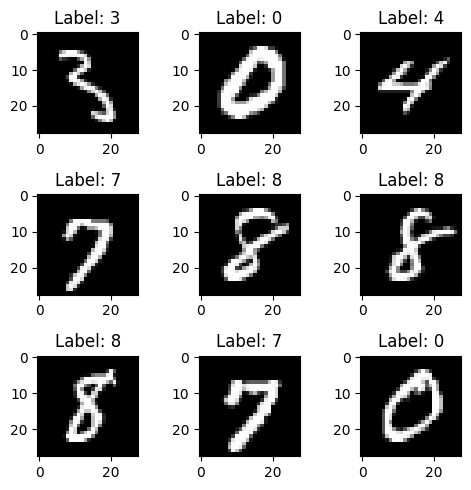

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(0, X_train.shape[0])
    image = X_train[index]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {y_train[index]}')
plt.tight_layout()
plt.show()

# Flatten the images


In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Create and train the perceptron classifier


In [7]:
perceptron = Perceptron()
perceptron.fit(X_train_flat, y_train)

Perceptron()

# Evaluate accuracy on the train set


In [8]:
train_accuracy = perceptron.score(X_train_flat, y_train)
print(f"Train Accuracy: {train_accuracy}")
# Evaluate accuracy on the test set
test_accuracy = perceptron.score(X_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.81


# Standardize the data


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Create and train the perceptron classifier on scaled data


In [10]:
perceptron_scaled = Perceptron()
perceptron_scaled.fit(X_train_scaled, y_train)

Perceptron()

# Evaluate accuracy on the train and test set using scaled data


In [11]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_scaled = perceptron_scaled.score(X_train_scaled, y_train)
print(f"Scaled Train Accuracy: {train_accuracy_scaled}")

# Evaluate accuracy on the test set using scaled data
test_accuracy_scaled = perceptron_scaled.score(X_test_scaled, y_test)
print(f"Scaled Test Accuracy: {test_accuracy_scaled}")

Scaled Train Accuracy: 0.9966666666666667
Scaled Test Accuracy: 0.78


# Min-max scaling


In [12]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply min-max scaling to the training data
X_train_mmscaled = scaler.fit_transform(X_train_flat)

# Apply min-max scaling to the test data
X_test_mmscaled = scaler.transform(X_test_flat)

# Create and train the perceptron classifier on min-max scaled data


In [13]:
perceptron_minmax = Perceptron()
perceptron_minmax.fit(X_train_mmscaled, y_train)

Perceptron()

# Evaluate accuracy on the train and test set using min-max scaled data


In [14]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_minmax = perceptron_minmax.score(X_train_scaled, y_train)
print(f"Min-Max Scaled Train Accuracy: {train_accuracy_minmax}")

# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_minmax = perceptron_minmax.score(X_test_scaled, y_test)
print(f"Min-Max Scaled Test Accuracy: {test_accuracy_minmax}")

Min-Max Scaled Train Accuracy: 0.99
Min-Max Scaled Test Accuracy: 0.76


# Create and train the KNN classifier


In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_flat, y_train)

KNeighborsClassifier()

# Evaluate accuracy on the train and test set


In [16]:
# Evaluate accuracy on the train set
train_accuracy_knn = knn.score(X_train_flat, y_train)
print(f"KNN Train Accuracy: {train_accuracy_knn}")
# Evaluate accuracy on the test set
test_accuracy_knn = knn.score(X_test_flat, y_test)
print(f"KNN Test Accuracy: {test_accuracy_knn}")

KNN Train Accuracy: 0.895
KNN Test Accuracy: 0.78


# Create and train the KNN classifier on scaled data


In [17]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# Evaluate accuracy on the train and test set using scaled data


In [18]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_knn_scaled = knn_scaled.score(X_train_scaled, y_train)
print(f"Scaled KNN Train Accuracy: {train_accuracy_knn_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_knn_scaled = knn_scaled.score(X_test_scaled, y_test)
print(f"Scaled KNN Test Accuracy: {test_accuracy_knn_scaled}")

Scaled KNN Train Accuracy: 0.8833333333333333
Scaled KNN Test Accuracy: 0.73


# Create and train the KNN classifier on min-max scaled data


In [19]:
knn_minmax = KNeighborsClassifier()
knn_minmax.fit(X_train_mmscaled, y_train)

KNeighborsClassifier()

# Evaluate accuracy on the train and test set using min-max scaled data


In [20]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_knn_minmax = knn_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled KNN Train Accuracy: {train_accuracy_knn_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_knn_minmax = knn_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled KNN Test Accuracy: {test_accuracy_knn_minmax}")

Min-Max Scaled KNN Train Accuracy: 0.8933333333333333
Min-Max Scaled KNN Test Accuracy: 0.78


# Create and train the decision tree classifier


In [21]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_flat, y_train)

DecisionTreeClassifier()

# Evaluate accuracy on the train and test set


In [22]:
# Evaluate accuracy on the train set
train_accuracy_dt = decision_tree.score(X_train_flat, y_train)
print(f"Decision Tree Train Accuracy: {train_accuracy_dt}")
# Evaluate accuracy on the test set
test_accuracy_dt = decision_tree.score(X_test_flat, y_test)
print(f"Decision Tree Test Accuracy: {test_accuracy_dt}")

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.58


# Create and train the decision tree classifier on scaled data


In [23]:
decision_tree_scaled = DecisionTreeClassifier()
decision_tree_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

# Evaluate accuracy on the train and test set using scaled data


In [24]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_dt_scaled = decision_tree_scaled.score(X_train_scaled, y_train)
print(f"Scaled Decision Tree Train Accuracy: {train_accuracy_dt_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_dt_scaled = decision_tree_scaled.score(X_test_scaled, y_test)
print(f"Scaled Decision Tree Test Accuracy: {test_accuracy_dt_scaled}")

Scaled Decision Tree Train Accuracy: 1.0
Scaled Decision Tree Test Accuracy: 0.54


# Create and train the decision tree classifier on min-max scaled data


In [25]:
decision_tree_minmax = DecisionTreeClassifier()
decision_tree_minmax.fit(X_train_mmscaled, y_train)

DecisionTreeClassifier()

# Evaluate accuracy on the train and test set using min-max scaled data


In [26]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_dt_minmax = decision_tree_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Decision Tree Train Accuracy: {train_accuracy_dt_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_dt_minmax = decision_tree_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Decision Tree Test Accuracy: {test_accuracy_dt_minmax}")

Min-Max Scaled Decision Tree Train Accuracy: 1.0
Min-Max Scaled Decision Tree Test Accuracy: 0.54


# Create and train the random forest classifier


In [27]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_flat, y_train)

RandomForestClassifier()

# Evaluate accuracy on the train and test set


In [28]:
# Evaluate accuracy on the train set
train_accuracy_rf = random_forest.score(X_train_flat, y_train)
print(f"Random Forest Train Accuracy: {train_accuracy_rf}")
# Evaluate accuracy on the test set
test_accuracy_rf = random_forest.score(X_test_flat, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.79


# Create and train the random forest classifier on scaled data


In [29]:
random_forest_scaled = RandomForestClassifier()
random_forest_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier()

# Evaluate accuracy on the train and test set using scaled data


In [30]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_rf_scaled = random_forest_scaled.score(X_train_scaled, y_train)
print(f"Scaled Random Forest Train Accuracy: {train_accuracy_rf_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_rf_scaled = random_forest_scaled.score(X_test_scaled, y_test)
print(f"Scaled Random Forest Test Accuracy: {test_accuracy_rf_scaled}")

Scaled Random Forest Train Accuracy: 1.0
Scaled Random Forest Test Accuracy: 0.77


# Create and train the random forest classifier on min-max scaled data


In [31]:
random_forest_minmax = RandomForestClassifier()
random_forest_minmax.fit(X_train_mmscaled, y_train)

RandomForestClassifier()

# Evaluate accuracy on the train and test set using min-max scaled data


In [32]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_rf_minmax = random_forest_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Random Forest Train Accuracy: {train_accuracy_rf_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_rf_minmax = random_forest_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Random Forest Test Accuracy: {test_accuracy_rf_minmax}")

Min-Max Scaled Random Forest Train Accuracy: 1.0
Min-Max Scaled Random Forest Test Accuracy: 0.82


# Create and train the support vector classifier


In [33]:
svc = SVC()
svc.fit(X_train_flat, y_train)

SVC()

# Evaluate accuracy on the train and test set


In [34]:
# Evaluate accuracy on the train set
train_accuracy_svc = svc.score(X_train_flat, y_train)
print(f"SVC Train Accuracy: {train_accuracy_svc}")
# Evaluate accuracy on the test set
test_accuracy_svc = svc.score(X_test_flat, y_test)
print(f"SVC Test Accuracy: {test_accuracy_svc}")

SVC Train Accuracy: 0.98
SVC Test Accuracy: 0.87


# Create and train the support vector classifier on scaled data


In [35]:
svc_scaled = SVC()
svc_scaled.fit(X_train_scaled, y_train)

SVC()

# Evaluate accuracy on the train and test set using scaled data


In [36]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_svc_scaled = svc_scaled.score(X_train_scaled, y_train)
print(f"Scaled SVC Train Accuracy: {train_accuracy_svc_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_svc_scaled = svc_scaled.score(X_test_scaled, y_test)
print(f"Scaled SVC Test Accuracy: {test_accuracy_svc_scaled}")

Scaled SVC Train Accuracy: 0.985
Scaled SVC Test Accuracy: 0.73


# Create and train the support vector classifier on min-max scaled data


In [37]:
svc_minmax = SVC()
svc_minmax.fit(X_train_mmscaled, y_train)

SVC()

# Evaluate accuracy on the train and test set using min-max scaled data


In [38]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_svc_minmax = svc_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled SVC Train Accuracy: {train_accuracy_svc_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_svc_minmax = svc_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled SVC Test Accuracy: {test_accuracy_svc_minmax}")

Min-Max Scaled SVC Train Accuracy: 0.9816666666666667
Min-Max Scaled SVC Test Accuracy: 0.85


# Create and train the logistic regression classifier


In [39]:
logistic_regression = LogisticRegression(max_iter=1000)  # Increase the number of iterations
logistic_regression.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000)

# Evaluate accuracy on the train and test set


In [40]:
# Evaluate accuracy on the train set
train_accuracy_lr = logistic_regression.score(X_train_flat, y_train)
print(f"Logistic Regression Train Accuracy: {train_accuracy_lr}")
# Evaluate accuracy on the test set
test_accuracy_lr = logistic_regression.score(X_test_flat, y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy_lr}")
# Create and train the logistic regression classifier on scaled data

Logistic Regression Train Accuracy: 1.0
Logistic Regression Test Accuracy: 0.81


# Create and train the logistic regression classifier on scaled data


In [41]:
logistic_regression_scaled = LogisticRegression(max_iter=1000)
logistic_regression_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Evaluate accuracy on the train and test set using scaled data


In [42]:
# Evaluate accuracy on the train set using scaled data
train_accuracy_lr_scaled = logistic_regression_scaled.score(X_train_scaled, y_train)
print(f"Scaled Logistic Regression Train Accuracy: {train_accuracy_lr_scaled}")
# Evaluate accuracy on the test set using scaled data
test_accuracy_lr_scaled = logistic_regression_scaled.score(X_test_scaled, y_test)
print(f"Scaled Logistic Regression Test Accuracy: {test_accuracy_lr_scaled}")
# Create and train the logistic regression classifier on min-max scaled data

Scaled Logistic Regression Train Accuracy: 1.0
Scaled Logistic Regression Test Accuracy: 0.76


# Create and train the logistic regression classifier on min-max scaled data


In [43]:
logistic_regression_minmax = LogisticRegression(max_iter=1000)
logistic_regression_minmax.fit(X_train_mmscaled, y_train)

LogisticRegression(max_iter=1000)

# Evaluate accuracy on the train and test set using min-max scaled data


In [44]:
# Evaluate accuracy on the train set using min-max scaled data
train_accuracy_lr_minmax = logistic_regression_minmax.score(X_train_mmscaled, y_train)
print(f"Min-Max Scaled Logistic Regression Train Accuracy: {train_accuracy_lr_minmax}")
# Evaluate accuracy on the test set using min-max scaled data
test_accuracy_lr_minmax = logistic_regression_minmax.score(X_test_mmscaled, y_test)
print(f"Min-Max Scaled Logistic Regression Test Accuracy: {test_accuracy_lr_minmax}")

Min-Max Scaled Logistic Regression Train Accuracy: 1.0
Min-Max Scaled Logistic Regression Test Accuracy: 0.8


# Create a dictionary to store the accuracies


In [45]:
accuracies = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Add accuracies for each model to the dictionary
accuracies['Model'].extend(['Perceptron', 'Scaled Perceptron', 'Min-Max Scaled Perceptron',
                            'KNN', 'Scaled KNN', 'Min-Max Scaled KNN',
                            'Decision Tree', 'Scaled Decision Tree', 'Min-Max Scaled Decision Tree',
                            'Random Forest', 'Scaled Random Forest', 'Min-Max Scaled Random Forest',
                            'SVC', 'Scaled SVC', 'Min-Max Scaled SVC',
                            'Logistic Regression', 'Scaled Logistic Regression', 'Min-Max Scaled Logistic Regression'])
accuracies['Train Accuracy'].extend([train_accuracy, train_accuracy_scaled, train_accuracy_minmax,
                                     train_accuracy_knn, train_accuracy_knn_scaled, train_accuracy_knn_minmax,
                                     train_accuracy_dt, train_accuracy_dt_scaled, train_accuracy_dt_minmax,
                                     train_accuracy_rf, train_accuracy_rf_scaled, train_accuracy_rf_minmax,
                                     train_accuracy_svc, train_accuracy_svc_scaled, train_accuracy_svc_minmax,
                                     train_accuracy_lr, train_accuracy_lr_scaled, train_accuracy_lr_minmax])
accuracies['Test Accuracy'].extend([test_accuracy, test_accuracy_scaled, test_accuracy_minmax,
                                    test_accuracy_knn, test_accuracy_knn_scaled, test_accuracy_knn_minmax,
                                    test_accuracy_dt, test_accuracy_dt_scaled, test_accuracy_dt_minmax,
                                    test_accuracy_rf, test_accuracy_rf_scaled, test_accuracy_rf_minmax,
                                    test_accuracy_svc, test_accuracy_svc_scaled, test_accuracy_svc_minmax,
                                    test_accuracy_lr, test_accuracy_lr_scaled, test_accuracy_lr_minmax])

# Create a pandas DataFrame from the accuracies dictionary
df = pd.DataFrame(accuracies)

# Print the DataFrame
df

df.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy
12,SVC,0.980000,0.87
14,Min-Max Scaled SVC,0.981667,0.85
11,Min-Max Scaled Random Forest,1.000000,0.82
0,Perceptron,1.000000,0.81
15,Logistic Regression,1.000000,0.81
17,Min-Max Scaled Logistic Regression,1.000000,0.80
9,Random Forest,1.000000,0.79
1,Scaled Perceptron,0.996667,0.78
5,Min-Max Scaled KNN,0.893333,0.78
3,KNN,0.895000,0.78


# Plot the accuracies in descending order


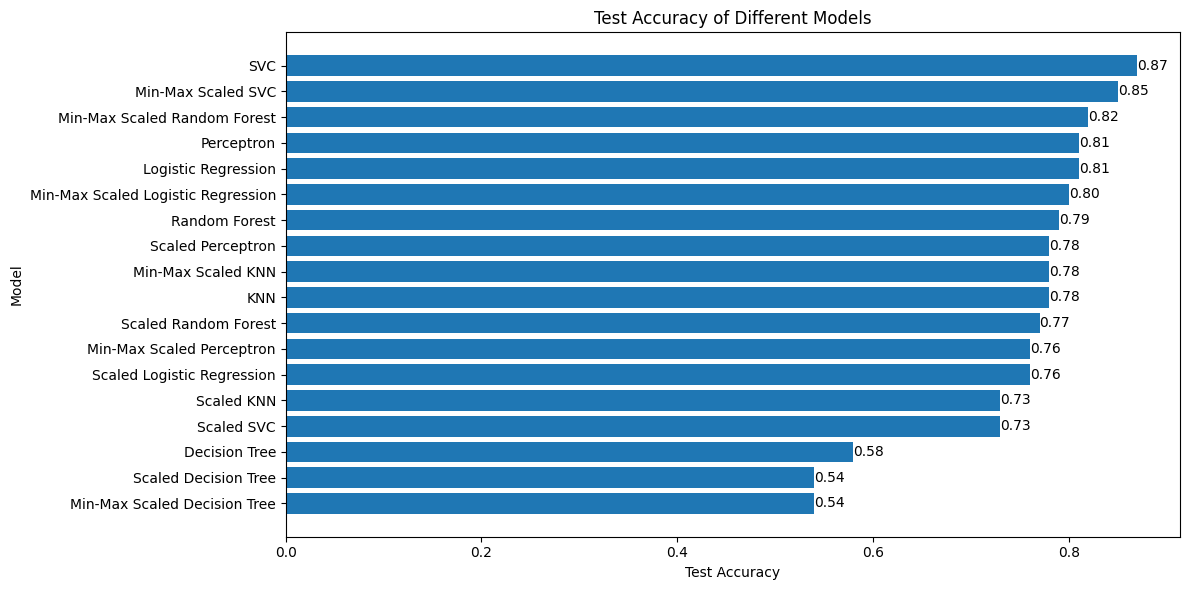

In [46]:
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='Test Accuracy', ascending=False)
plt.barh(df_sorted['Model'], df_sorted['Test Accuracy'])
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.title('Test Accuracy of Different Models')

# Annotate the values
for i, acc in enumerate(df_sorted['Test Accuracy']):
    plt.annotate(f"{acc:.2f}", (acc, i), ha='left', va='center')

# Show the plot
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()